In [1]:
# open tar.gz file
import tarfile
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
#from utils.plots import *

# extract data from folder with named "001, 002, 003 ...."
# each folder contains 8 pnm.ppm files(image) and 8 pnm.ppm.featureCoord files(label)

import os

In [2]:
# Specify the directory where the folders "001", "002", "003", etc., are located
cam1_directory = 'D:/YZV-DERSLER/ComputerVision/Project/Dataset/face_database_camera12/camera1'
cam2_directory = 'D:/YZV-DERSLER/ComputerVision/Project/Dataset/face_database_camera12/camera2'

In [3]:

def extract_data(base_directory):
    image_all = []
    label_all = []
    # Loop through each subdirectory in the base directory
    for subdir in sorted(os.listdir(base_directory)):
        # Check if the current item is indeed a directory
        subdir_path = os.path.join(base_directory, subdir)
        if os.path.isdir(subdir_path):
            # List all files in this subdirectory
            files = os.listdir(subdir_path)
            images = [file for file in files if file.endswith('.ppm')]
            labels = [file for file in files if file.endswith('.featureCoord')]
            # Process each image and its corresponding label file
            image_eachPerson = []
            label_eachPerson = []
            for image, label in zip(images, labels):
                image_path = os.path.join(subdir_path, image)
                label_path = os.path.join(subdir_path, label)
                
                # extract the data within these paths
                #im = Image.open(image_path)
                im = cv2.imread(image_path)
                image_eachPerson.append(im)
                
                
                # read the label file,
                label_for_an_image = []
                with open(label_path, 'r') as f:
                    lines = f.readlines()
                    #print(lines)
                    label = []
                    for line in lines:
                        #print(line)
                        x, y = line.split()
                        label.append([float(x), float(y)])
                    label_for_an_image.append(label)
                
                label_eachPerson.append(label)
                    
            image_all.append(image_eachPerson)
            label_all.append(label_eachPerson)

    return image_all, label_all
                

In [4]:
data_cam1 = extract_data(cam1_directory) # it includes two array, first one is image, second one is label
data_cam2 = extract_data(cam2_directory) # it includes two array, first one is image, second one is label

In [5]:
for i in range(3,5):
    print(i)

3
4


In [6]:
def extract_cam_par(cam1_directory):
    label_path = os.path.join(cam1_directory, "camera.txt")
    with open(label_path, 'r') as f:
        cam = {}
        lines = f.readlines()
        cam["cam_matrix"] = []
        cam["rad_dist"] = []
        cam["rot_matrix"] = []
        cam["trans_vec"] = []
        
        for l in range(3):
            x,y,z = lines[l].split()
            cam["cam_matrix"].append([float(x), float(y), float(z)])
        print(lines[3].split())
        
        r1,r2,r3 = lines[3].split()
        cam["rad_dist"].append([float(r1), float(r2), float(r3)])
        
        for l in range(4,7):
            x,y,z = lines[l].split()
            cam["rot_matrix"].append([float(x), float(y), float(z)])
        
        t1,t2,t3 = lines[7].split()
        cam["trans_vec"].append([float(t1), float(t2), float(t3)])
    return cam



In [7]:
cam1_par = extract_cam_par(cam1_directory)
cam2_par = extract_cam_par(cam2_directory)

['0', '0', '0']
['0', '0', '0']


In [8]:
len(data_cam2[0][0]), len(data_cam2[1])

(8, 100)

In [9]:
data_cam2[1][0][0]

[[265.168, 186.452],
 [330.195, 179.607],
 [313.083, 222.388],
 [285.703, 263.457],
 [331.906, 254.901],
 [217.254, 242.922],
 [-1.0, -1.0],
 [311.372, 251.479],
 [313.083, 268.591],
 [313.083, 280.57],
 [253.19, 189.874],
 [278.858, 189.874],
 [314.794, 184.741],
 [340.463, 179.607]]

In [10]:
data_cam1[1][0][4]

[[326.773, 172.762],
 [374.687, 165.917],
 [386.666, 208.698],
 [338.751, 253.19],
 [374.687, 246.345],
 [237.789, 232.655],
 [-1.0, -1.0],
 [369.553, 241.211],
 [367.842, 258.324],
 [362.709, 273.725],
 [311.372, 172.762],
 [333.618, 174.473],
 [-1.0, -1.0],
 [-1.0, -1.0]]

In [11]:
data_cam1[1][1][4][0][]

SyntaxError: invalid syntax (1350858814.py, line 1)

Each coordinate pair is specified for a part of face. For example 6th point is for left ear. And if, parts are not seen on the images. These are represented with "-1"

[265, 330, 313, 286, 332, 217, -1, 311, 313, 313, 253, 279, 315, 340] [186, 180, 222, 263, 255, 243, -1, 251, 269, 281, 190, 190, 185, 180]
[281, 340, 337, 299, 344, 219, -1, 330, 330, 330, 265, 293, 325, 347] [185, 178, 221, 263, 253, 248, -1, 250, 265, 279, 188, 188, 181, 176]
[298, 347, 358, 317, 356, 222, -1, 347, 346, 344, 282, 310, -1, -1] [186, 176, 216, 263, 251, 251, -1, 248, 265, 277, 188, 188, -1, -1]
[325, -1, 385, 344, -1, 246, -1, 371, 371, 368, 311, 332, -1, -1] [181, -1, 212, 258, -1, 253, -1, 243, 258, 275, 185, 183, -1, -1]
[346, -1, 402, 361, -1, 267, -1, 385, 385, 378, 334, -1, -1, -1] [180, -1, 205, 253, -1, 251, -1, 236, 255, 265, 181, -1, -1, -1]
[257, 323, 303, 272, 322, 210, -1, 301, 303, 303, 245, 272, 306, 334] [216, 209, 258, 291, 282, 255, -1, 284, 296, 305, 216, 219, 212, 207]
[260, 325, 305, 274, 325, 214, -1, 303, 305, 305, 246, 274, 308, 334] [197, 190, 240, 275, 267, 248, -1, 265, 281, 293, 198, 200, 197, 190]
[257, 322, 305, 274, 323, 214, -1, 303, 30

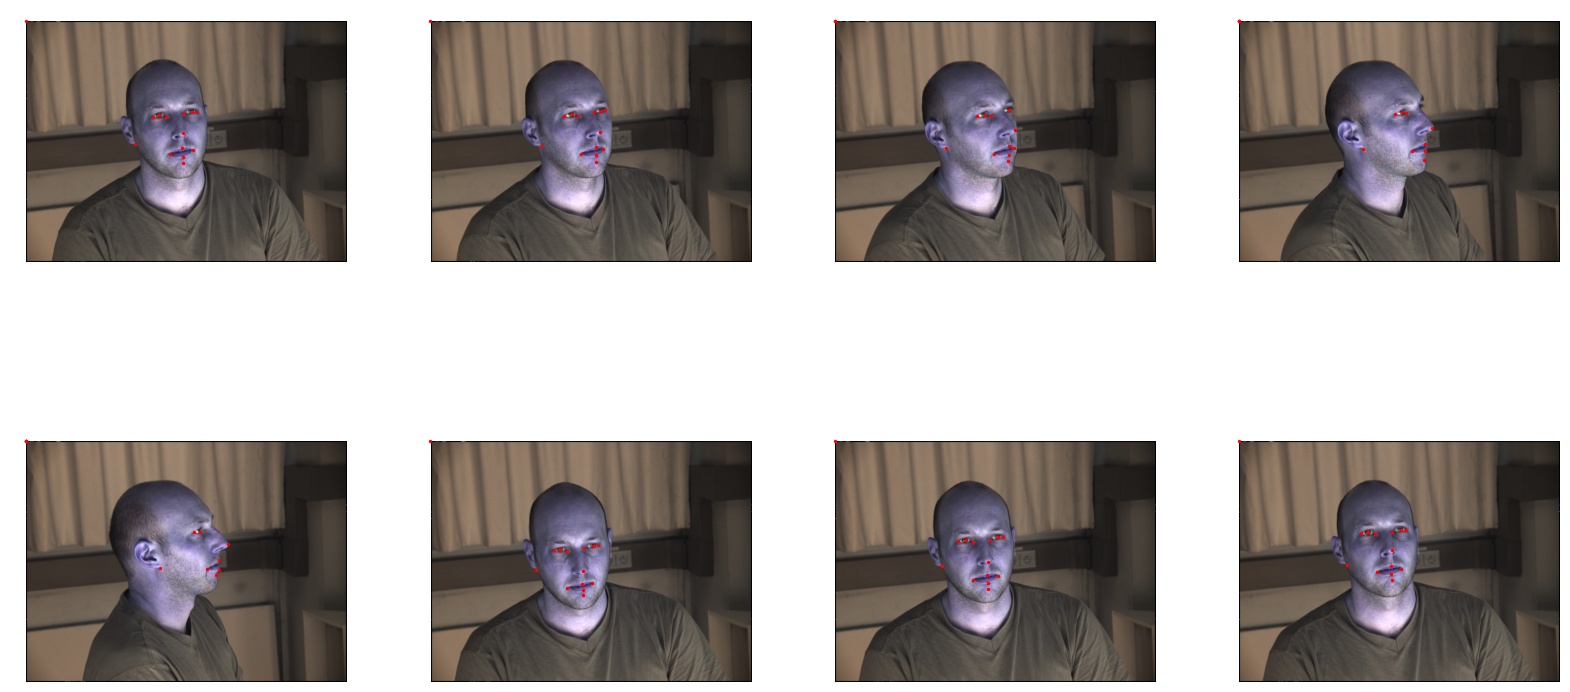

In [12]:
# plot first 8 images with matlpotlib
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.ravel()
for i in range(8):
    axs[i].imshow(data_cam2[0][0][i])
    print([round(x[0]) for x in data_cam2[1][0][i]], [round(x[1]) for x in data_cam2[1][0][i]])
    axs[i].scatter([round(float(x[0])) for x in data_cam2[1][0][i]], [round(float(x[1])) for x in data_cam2[1][0][i]], c='r', s=2)
    axs[i].axis('off')
plt.show()

[258, 322, 274, 264, 312, -1, 384, 282, 282, 282, 244, 272, 306, 334] [168, 172, 212, 250, 250, -1, 226, 244, 261, 275, 168, 173, 175, 175]
[265, 335, 296, 274, 325, 228, 380, 298, 298, 299, 255, 279, 318, 346] [169, 171, 212, 253, 251, 224, 224, 243, 260, 275, 169, 174, 173, 173]
[274, 344, 322, 287, 337, 222, -1, 315, 317, 317, 260, 289, 325, 352] [173, 171, 214, 253, 251, 229, -1, 245, 260, 279, 173, 176, 174, 171]
[303, 368, 359, 317, 361, 231, -1, 347, 347, 346, 289, 317, 351, 375] [171, 169, 210, 253, 250, 231, -1, 243, 260, 275, 174, 176, 171, 171]
[327, 375, 387, 339, 375, 238, -1, 370, 368, 363, 311, 334, -1, -1] [173, 166, 209, 253, 246, 233, -1, 241, 258, 274, 173, 174, -1, -1]
[236, 301, 253, 248, 294, -1, 371, 265, 269, 270, 226, 250, 284, 313] [195, 198, 248, 275, 275, -1, 236, 272, 287, 299, 193, 200, 202, 202]
[248, 313, 265, 255, 303, -1, 376, 274, 274, 275, 236, 262, 298, 325] [178, 181, 226, 260, 260, -1, 231, 255, 270, 284, 176, 181, 185, 185]
[255, 320, 269, 258, 3

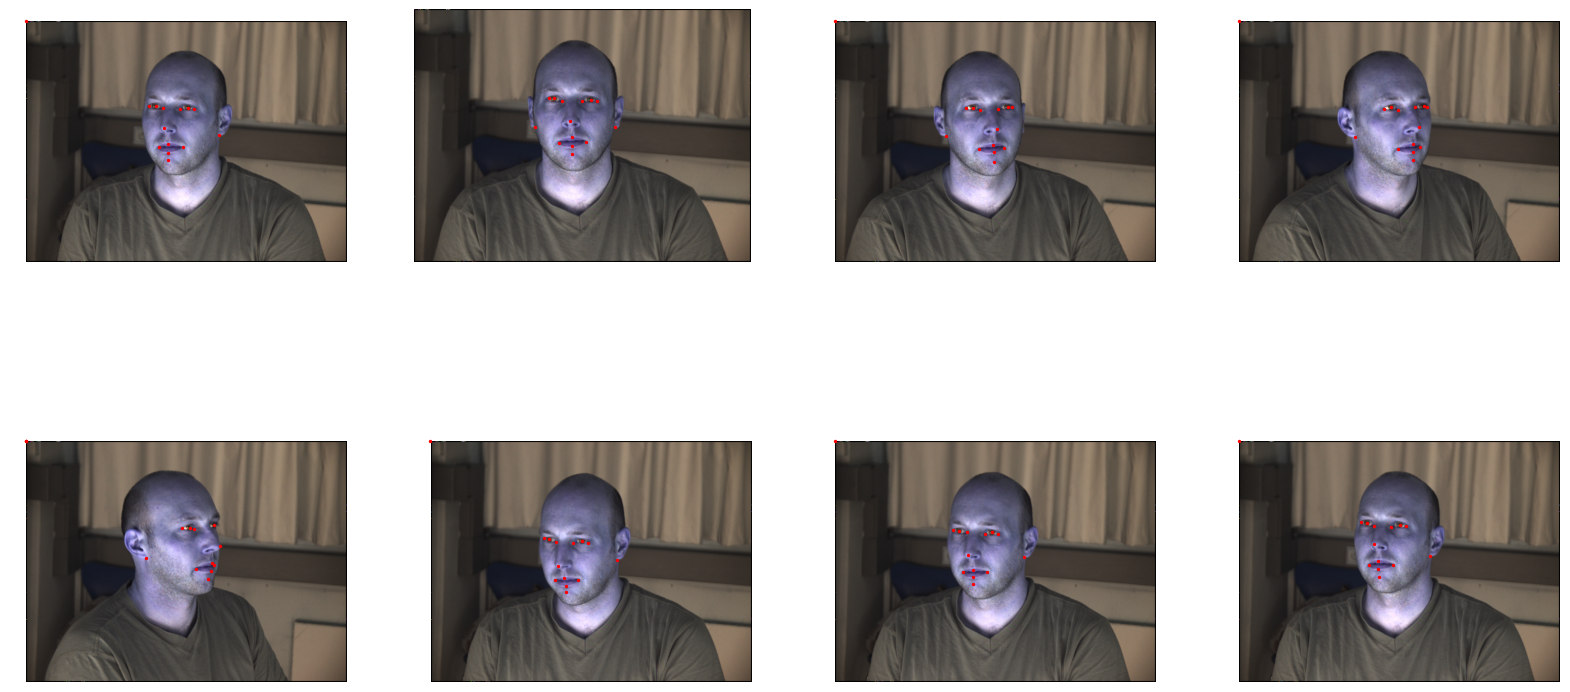

In [13]:
# plot first 8 images with matlpotlib
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.ravel()
for i in range(8):
    axs[i].imshow(data_cam1[0][0][i])
    print([round(x[0]) for x in data_cam1[1][0][i]], [round(x[1]) for x in data_cam1[1][0][i]])
    axs[i].scatter([round(float(x[0])) for x in data_cam1[1][0][i]], [round(float(x[1])) for x in data_cam1[1][0][i]], c='r', s=2)
    axs[i].axis('off')
plt.show()

FROM 2D TO 3D 

In [14]:
import numpy as np

R1 = np.array(cam1_par["rot_matrix"])  # Rotation matrix for camera 1
t1 = np.array(cam1_par["trans_vec"]).reshape((3, 1))  # Translation vector for camera 1
R2 = np.array(cam2_par["rot_matrix"])  # Rotation matrix for camera 2
t2 = np.array(cam2_par["trans_vec"]).reshape((3, 1))  # Translation vector for camera 2

# Compute relative rotation and translation
R_rel = np.dot(R2, R1.T)  # Correct computation of relative rotation
t_rel = t2 - np.dot(R_rel, t1)  # Correct computation of relative translation

print("Relative Rotation Matrix:\n", R_rel)

Relative Rotation Matrix:
 [[ 0.86392959 -0.0762826  -0.49780273]
 [ 0.03791142  0.99550772 -0.08675631]
 [ 0.50218411  0.05607918  0.86294008]]


In [15]:

# Assuming you have these matrices from your calibration process
K1 = np.array(cam1_par["cam_matrix"])  # Camera matrix for camera 1
K2 = np.array(cam2_par["cam_matrix"])  # Camera matrix for camera 2
R = R_rel   # Rotation matrix from camera 1 to camera 2
t = t_rel   # Translation vector from camera 1 to camera 2

# Compute the projection matrices for the two cameras
P1 = np.dot(K1, np.hstack((np.eye(3), np.zeros((3, 1)))))
P2 = np.dot(K2, np.hstack((R, t.reshape(3, 1))))

# Example corresponding points in both images (img1_pts and img2_pts)
# These should be Nx2 arrays where N is the number of corresponding points
img1_pts = np.array(data_cam1[1][11][6])  # Points from camera 1
img2_pts = np.array(data_cam2[1][11][6])  # Points from camera 2

# Convert points from 2D to homogeneous coordinates
ones = np.ones((img1_pts.shape[0], 1))
img1_pts_hom = np.hstack([img1_pts, ones])
img2_pts_hom = np.hstack([img2_pts, ones])

# Triangulate points
points_4d_hom = cv2.triangulatePoints(P1, P2, img1_pts.T, img2_pts.T)

# Convert homogeneous coordinates to 3D
points_3d = points_4d_hom / points_4d_hom[3]
points_3d = points_3d[:3].T

print("Reconstructed 3D points:\n", points_3d)


Reconstructed 3D points:
 [[ 1.11518262e+00  1.34719158e+01  1.31221404e+02]
 [ 4.57390564e+00  1.38506083e+01  1.37324940e+02]
 [ 1.38346788e+00  1.45231707e+01  1.30173757e+02]
 [-1.62889080e-01  1.50317923e+01  1.26081796e+02]
 [ 2.90853250e+00  1.55256148e+01  1.31811144e+02]
 [-1.28636761e+01  7.89908674e+00  1.04371346e+02]
 [ 1.11592968e+01  1.53839415e+01  1.63221097e+02]
 [ 1.20760609e+00  1.51562527e+01  1.28893454e+02]
 [ 1.02103747e+00  1.53924978e+01  1.28143143e+02]
 [ 1.00391994e+00  1.56119353e+01  1.27844443e+02]
 [ 5.45180556e-01  1.35008171e+01  1.30027691e+02]
 [ 1.91790657e+00  1.36529859e+01  1.32621847e+02]
 [ 3.74467642e+00  1.38248173e+01  1.35836434e+02]
 [ 5.34264175e+00  1.39751122e+01  1.38519839e+02]]


In [16]:
import plotly.graph_objects as go

# Assuming points_3d is your array of 3D points

# Create a scatter plot of the 3D points
fig = go.Figure(data=[go.Scatter3d(
    x=points_3d[:, 0],
    y=points_3d[:, 1],
    z=points_3d[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color=points_3d[:, 2],  # color points by Z coordinate
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8
    )
)])

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    width=800,
    height=800,
    margin=dict(l=10, r=10, b=10, t=10)
)

# Show the plot
fig.show()


In [17]:
import cv2
import numpy as np

# Assume K1, K2, D1, D2, R1, R2, t1, t2 are loaded properly
# D1 and D2 are distortion coefficients for camera1 and camera2 respectively

# Assuming you have these matrices from your calibration process
K1 = np.array(cam1_par["cam_matrix"])  # Camera matrix for camera 1
K2 = np.array(cam2_par["cam_matrix"])  # Camera matrix for camera 2
R1 = np.array(cam1_par["rot_matrix"])    # Rotation matrix from camera 1 to camera 2
R2 = np.array(cam2_par["rot_matrix"])    # Translation vector from camera 1 to camera 2

D1_ = cam1_par["rad_dist"].copy()  # Distortion coefficients for camera 1
D2_= cam2_par["rad_dist"].copy()   # Distortion coefficients for camera 2
for i in range(2):
    D1_[0].append(0.0)
    D2_[0].append(0.0)
D1 = np.array(D1_)
D2 = np.array(D2_)

t1 = np.array(cam1_par["trans_vec"]).reshape((3, 1))  # Translation vector for camera 1
t2 = np.array(cam2_par["trans_vec"]).reshape((3, 1))  # Translation vector for camera 1

# Stereo rectification (OpenCV provides R1, R2, P1, P2, Q directly from stereoRectify)
R, T = R2 @ R1.T, t2 - R2 @ R1.T @ t1  # Compute relative rotation and translation
R1, R2, P1, P2, Q, roi1, roi2 = cv2.stereoRectify(K1, D1, K2, D2, (640, 480), R, T)


In [18]:
# Ensure you are passing the correct dimensions
imageSize = (640, 480)  # Confirm this matches your actual image size

# Now call stereoRectify with the reshaped distortion coefficients
R1, R2, P1, P2, Q, roi1, roi2 = cv2.stereoRectify(K1, D1, K2, D2, imageSize, R, T)

In [19]:
# Load your images
img1 = data_cam1[0][2][0]
img2 = data_cam2[0][2][0]

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Undistort and rectify images
map1x, map1y = cv2.initUndistortRectifyMap(K1, D1, R1, P1, imageSize, cv2.CV_32FC1)
map2x, map2y = cv2.initUndistortRectifyMap(K2, D2, R2, P2, imageSize, cv2.CV_32FC1)
rectified1 = cv2.remap(gray1, map1x, map1y, cv2.INTER_LINEAR)
rectified2 = cv2.remap(gray2, map2x, map2y, cv2.INTER_LINEAR)

In [20]:
stereo = cv2.StereoSGBM_create(minDisparity=0,
                                    numDisparities=64,
                                    blockSize=5,
                                    P1=8 * 3 * 5**2,
                                    P2=32 * 3 * 5**2,
                                    disp12MaxDiff=1,
                                    uniquenessRatio=15,
                                    speckleWindowSize=0,
                                    speckleRange=2,
                                    preFilterCap=63,
                                    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY)


disparity = stereo.compute(gray1, gray2)

In [21]:
# Optional: Normalize the disparity for visualization
disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Display the disparity map
cv2.imshow('Disparity Map', disparity_normalized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# Convert disparity to 3D points
points_3D = cv2.reprojectImageTo3D(disparity, Q)

# Optionally filter points with a valid disparity
# Check for infinite and NaN values
valid_points = (disparity > disparity.min()) & ~np.isinf(points_3D).any(axis=2) & ~np.isnan(points_3D).any(axis=2)

# Filter the points to exclude infinite and NaN values
filtered_points_3D = points_3D[valid_points]


In [23]:
filtered_points_3D

array([[ 832.89496 ,   56.64615 , -460.17746 ],
       [ 869.37823 ,   60.12195 , -488.41388 ],
       [ 867.71765 ,   60.02241 , -487.60526 ],
       ...,
       [ 753.9601  ,  -45.778336, -485.99597 ],
       [ 753.7396  ,  -45.778336, -485.99597 ],
       [ 753.51917 ,  -45.778336, -485.99597 ]], dtype=float32)

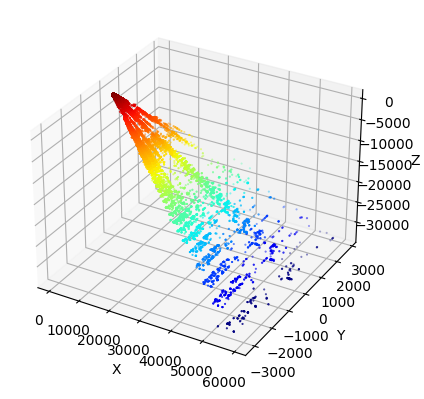

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Remove points with a 'z' value that is too far away to be reliable
valid_mask = filtered_points_3D  # Define some reasonable max_z_value

# Mask out invalid points
valid_points = filtered_points_3D
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(valid_points[:, 0], valid_points[:, 1], valid_points[:, 2], s=1, c=valid_points[:, 2], cmap='jet', marker='.')

# Setting labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
